In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
text=pd.read_csv(r"C:\Users\Manish\Desktop\desktop/mbti_1.csv" ,index_col='type')
print(text.shape)
print(text.head())

(8675, 1)
                                                  posts
type                                                   
INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
ENTP  'I'm finding the lack of me in these posts ver...
INTP  'Good one  _____   https://www.youtube.com/wat...
INTJ  'Dear INTP,   I enjoyed our conversation the o...
ENTJ  'You're fired.|||That's another silly misconce...


In [3]:
df=pd.read_csv(r"C:\Users\Manish\Desktop\desktop/mbti_1.csv")
frame = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


In [4]:
[p.split('|||') for p in df.head(1).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

In [5]:
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


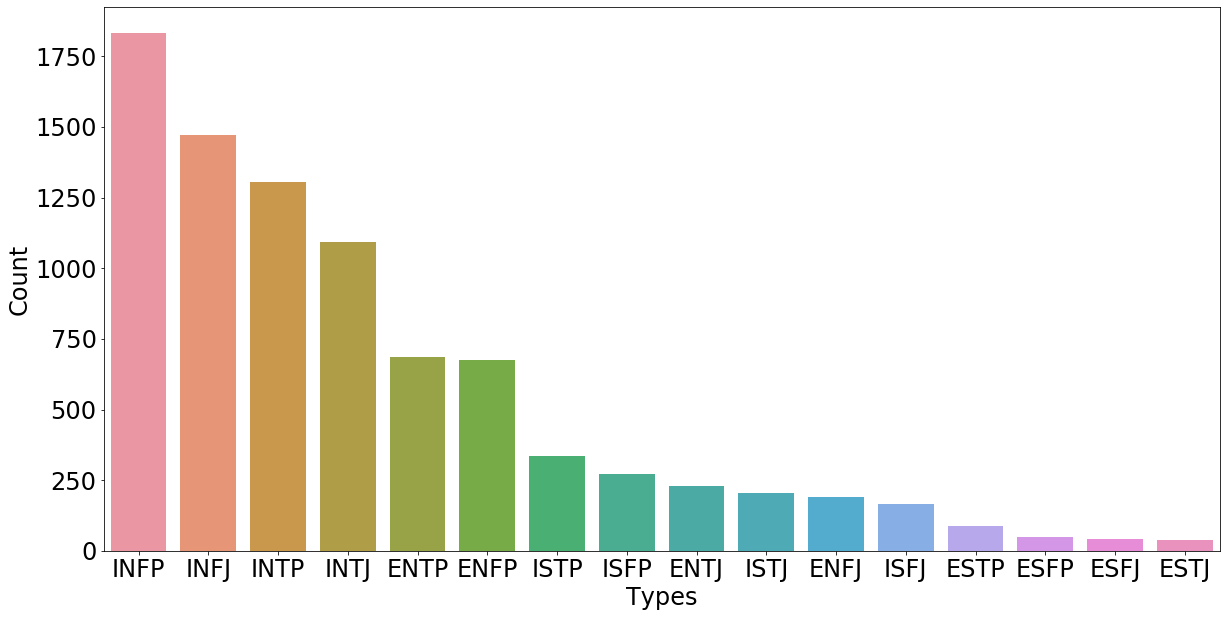

In [6]:
various_types = df['type'].value_counts()
plt.figure(figsize=(20,10))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.ylabel('Count', fontsize=24)
plt.xlabel('Types', fontsize=24)
sns.barplot(various_types.index, various_types.values, alpha=1)

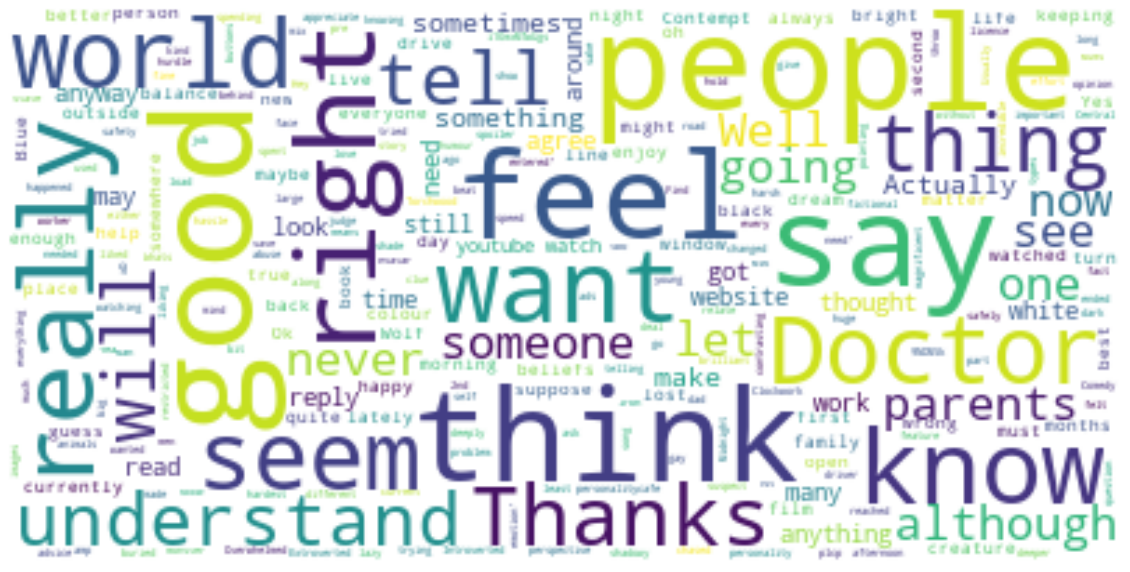

In [7]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
plt.figure(figsize=(20,20))
wcloud = df.posts[8674]
wordcloud = WordCloud(max_font_size=50, max_words=8674, background_color="white").generate(wcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


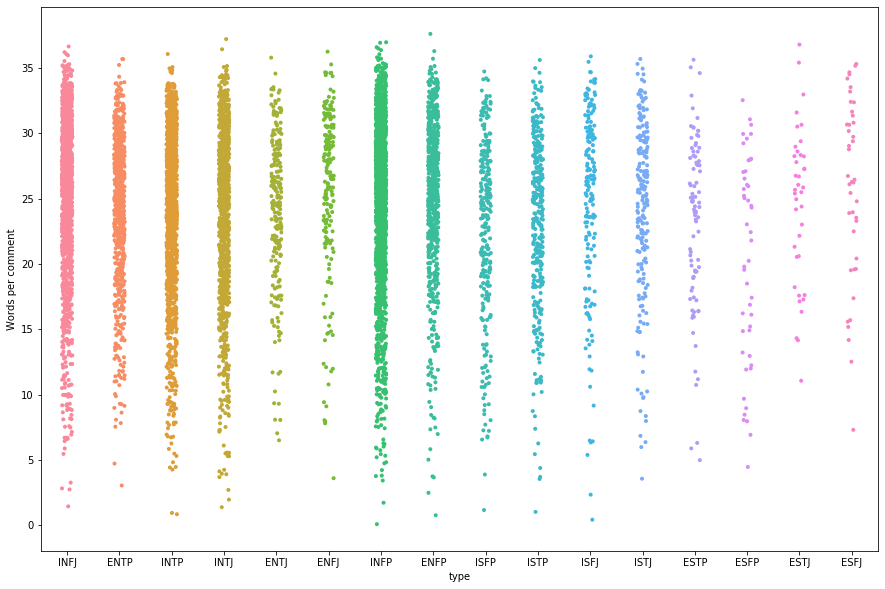

In [8]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())
plt.figure(figsize=(15,10))
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [9]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

df = df.join(df.apply (lambda row: get_types (row),axis=1))
df.head(5)

,type,posts,words_per_comment,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0,1,1,1


In [10]:
binary_Persoanlity = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
binary_personality_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):    
    return [binary_Persoanlity[l] for l in personality]

def translate_back(personality):
    s = ""
    for i, l in enumerate(personality):
        s += binary_personality_list[i][l]
    return s
d = df.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [11]:
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
unique_type_list = [x.lower() for x in unique_type_list]
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()
cachedStopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 600 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in unique_type_list:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)
    
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality
list_posts, list_personality  = pre_process_data(df, remove_stop_words=True)


1 of 8675 rows
600 of 8675 rows
1200 of 8675 rows
1800 of 8675 rows
2400 of 8675 rows
3000 of 8675 rows
3600 of 8675 rows
4200 of 8675 rows
4800 of 8675 rows
5400 of 8675 rows
6000 of 8675 rows
6600 of 8675 rows
7200 of 8675 rows
7800 of 8675 rows
8400 of 8675 rows
8675 of 8675 rows


In [12]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

X_cnt = cntizer.fit_transform(list_posts)
tfizer = TfidfTransformer()
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
feature_names = list(enumerate(cntizer.get_feature_names()))
X_tfidf.shape
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04934057, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14651861, 0.05312313, 0.12784862, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06779153, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04002664, 0.        , ..., 0.        , 0.05382869,
        0.        ]])

In [14]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [15]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])

MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


In [16]:
from sklearn.model_selection import train_test_split
X = X_tfidf

In [17]:


type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]
for l in range(len(type_indicators)):
    print("\n%s " % (type_indicators[l]))
    Y = list_personality[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    clf = SGDClassifier(max_iter=1000,tol=1e-3)
    clf.fit(X_train,y_train)
    y_pred1=clf.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    print("accuracy=",accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_test, y_pred1))
    print("f1Score(weighted)=",f1_score(y_test,y_pred1,average='weighted'))
    print("f1Score(micro)=",f1_score(y_test,y_pred1,average='micro'))
    print("recall Score(weighted)=",recall_score(y_test, y_pred1, average='weighted'))  
    print("recall Score(micro)=",recall_score(y_test, y_pred1, average='micro'))
    print("precision Score(weighted)=",precision_score(y_test, y_pred1, average='weighted'))  
    print("precision Score(micro)=",precision_score(y_test, y_pred1, average='micro'))


IE: Introversion (I) / Extroversion (E) 
accuracy= 0.7828492392807745
[[1642   33]
 [ 438   56]]
f1Score(weighted)= 0.7191343305677355
f1Score(micro)= 0.7828492392807745
recall Score(weighted)= 0.7828492392807745
recall Score(micro)= 0.7828492392807745
precision Score(weighted)= 0.752934584841084
precision Score(micro)= 0.7828492392807745

NS: Intuition (N) – Sensing (S) 
accuracy= 0.8575380359612724
[[1851    7]
 [ 302    9]]
f1Score(weighted)= 0.798516547928741
f1Score(micro)= 0.8575380359612724
recall Score(weighted)= 0.8575380359612724
recall Score(micro)= 0.8575380359612724
precision Score(weighted)= 0.8171124806391288
precision Score(micro)= 0.8575380359612724

FT: Feeling (F) - Thinking (T) 
accuracy= 0.760258183494698
[[917 256]
 [264 732]]
f1Score(weighted)= 0.7601822108262588
f1Score(micro)= 0.760258183494698
recall Score(weighted)= 0.760258183494698
recall Score(micro)= 0.760258183494698
precision Score(weighted)= 0.7601269896235001
precision Score(micro)= 0.760258183494698

<Figure size 432x288 with 0 Axes>

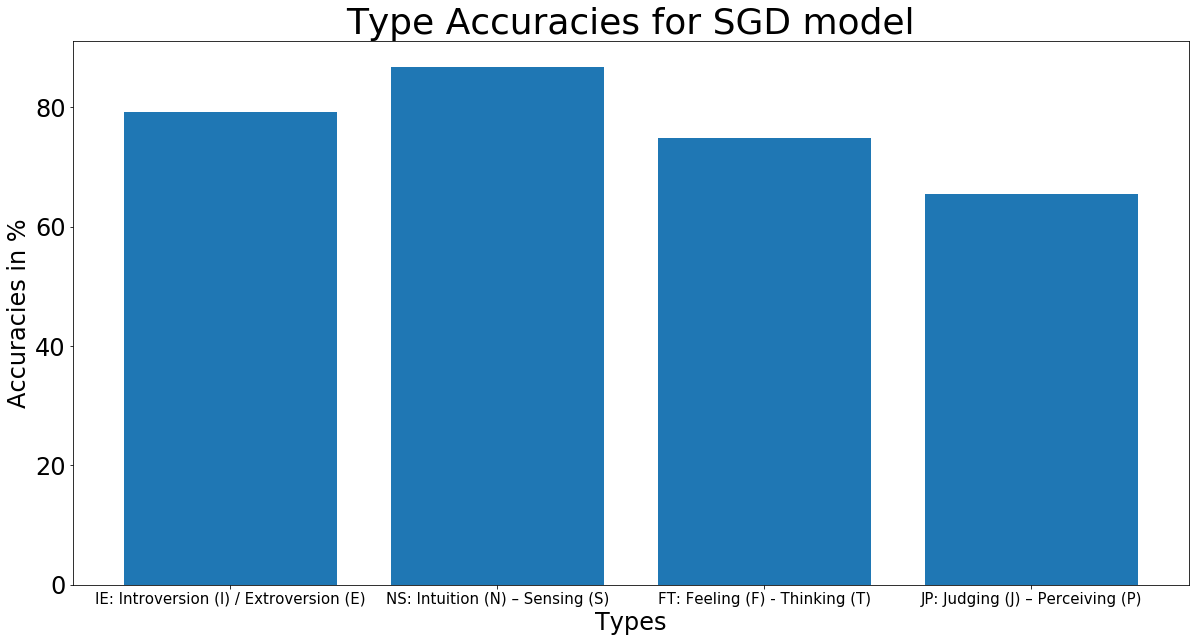

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.title('Type Accuracies for SGD model',fontsize=36, rotation=0)
plt.ylabel('Accuracies in %',fontsize=24, rotation=90)
plt.xlabel('Types',fontsize=24, rotation=0)
models = ['IE: Introversion (I) / Extroversion (E)', 'NS: Intuition (N) – Sensing (S)', 'FT: Feeling (F) - Thinking (T)', 'JP: Judging (J) – Perceiving (P)']
accuracy = [79.16,86.76,74.87,65.55]
plt.bar(models,accuracy)
plt.show()

In [19]:
for l in range(len(type_indicators)):
    print("\n%s " % (type_indicators[l]))
    Y = list_personality[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    logregg = LogisticRegression(max_iter=100,penalty='l2',solver='saga')
    logregg.fit(X_train, y_train)
    logregg.score(X_train, y_train)
    y_pred2=logregg.predict(X_test)
    from sklearn.metrics import accuracy_score
    print("Accuracy:",accuracy_score(y_test, y_pred2))
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred2))
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    print("accuracy=",accuracy_score(y_test,y_pred2))
    print("f1Score(weighted)=",f1_score(y_test,y_pred2,average='weighted'))
    print("f1Score(micro)=",f1_score(y_test,y_pred2,average='micro'))
    print("recall Score(weighted)=",recall_score(y_test, y_pred2, average='weighted'))  
    print("recall Score(micro)=",recall_score(y_test, y_pred2, average='micro'))
    print("precision Score(weighted)=",precision_score(y_test, y_pred2, average='weighted'))  
    print("precision Score(micro)=",precision_score(y_test, y_pred2, average='micro'))


IE: Introversion (I) / Extroversion (E) 
Accuracy: 0.7906869525126786
[[1640   39]
 [ 415   75]]
accuracy= 0.7906869525126786
f1Score(weighted)= 0.7360750589130379
f1Score(micro)= 0.7906869525126786
recall Score(weighted)= 0.7906869525126786
recall Score(micro)= 0.7906869525126786
precision Score(weighted)= 0.7663901772853621
precision Score(micro)= 0.7906869525126786

NS: Intuition (N) – Sensing (S) 
Accuracy: 0.851083448593822
[[1843    0]
 [ 323    3]]
accuracy= 0.851083448593822
f1Score(weighted)= 0.7839820825703233
f1Score(micro)= 0.851083448593822
recall Score(weighted)= 0.851083448593822
recall Score(micro)= 0.851083448593822
precision Score(weighted)= 0.8732903027508837
precision Score(micro)= 0.851083448593822

FT: Feeling (F) - Thinking (T) 
Accuracy: 0.7773167358229599
[[982 215]
 [268 704]]
accuracy= 0.7773167358229599
f1Score(weighted)= 0.77660767621525
f1Score(micro)= 0.7773167358229599
recall Score(weighted)= 0.7773167358229599
recall Score(micro)= 0.7773167358229599
pr

<Figure size 432x288 with 0 Axes>

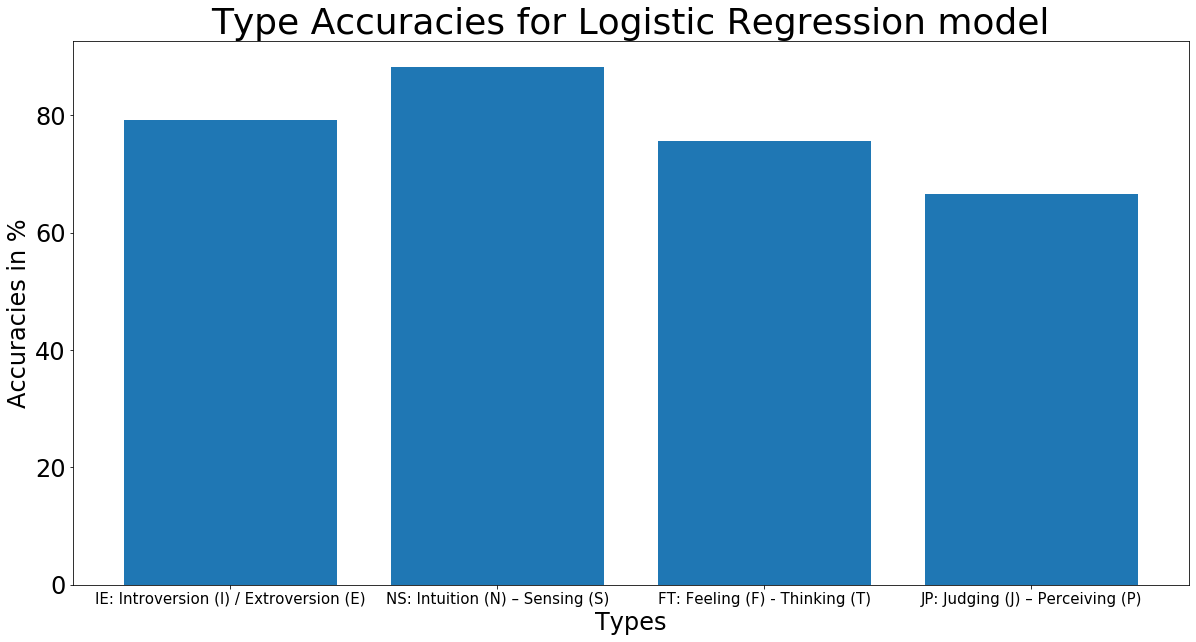

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.title('Type Accuracies for Logistic Regression model',fontsize=36, rotation=0)
plt.ylabel('Accuracies in %',fontsize=24, rotation=90)
plt.xlabel('Types',fontsize=24, rotation=0)
models = ['IE: Introversion (I) / Extroversion (E)', 'NS: Intuition (N) – Sensing (S)', 'FT: Feeling (F) - Thinking (T)', 'JP: Judging (J) – Perceiving (P)']
accuracy = [79.20,88.24,75.61,66.57]
plt.bar(models,accuracy)
plt.show()

In [21]:
for l in range(len(type_indicators)):
    print("\n%s " % (type_indicators[l]))
    Y = list_personality[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    knnn = KNeighborsClassifier (n_neighbors = 32,leaf_size=45,algorithm='kd_tree')
    knnn.fit(X_train, y_train)
    y_pred3 = knnn.predict(X_test)
    from sklearn.metrics import accuracy_score
    print("Accuracy:",accuracy_score(y_test, y_pred3))
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred3))

    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    print("accuracy=",accuracy_score(y_test,y_pred3))
    print("f1Score(weighted)=",f1_score(y_test,y_pred3,average='weighted'))
    print("f1Score(micro)=",f1_score(y_test,y_pred3,average='micro'))
    print("recall Score(weighted)=",recall_score(y_test, y_pred3, average='weighted'))  
    print("recall Score(micro)=",recall_score(y_test, y_pred3, average='micro'))
    print("precision Score(weighted)=",precision_score(y_test, y_pred3, average='weighted'))  
    print("precision Score(micro)=",precision_score(y_test, y_pred3, average='micro'))


IE: Introversion (I) / Extroversion (E) 
Accuracy: 0.751959428307976
[[1625   14]
 [ 524    6]]
accuracy= 0.751959428307976
f1Score(weighted)= 0.6536563565788854
f1Score(micro)= 0.7519594283079759
recall Score(weighted)= 0.751959428307976
recall Score(micro)= 0.751959428307976
precision Score(weighted)= 0.6447005597937518
precision Score(micro)= 0.751959428307976

NS: Intuition (N) – Sensing (S) 
Accuracy: 0.8579990779160903
[[1861    0]
 [ 308    0]]
accuracy= 0.8579990779160903
f1Score(weighted)= 0.7924249548396248
f1Score(micro)= 0.8579990779160903
recall Score(weighted)= 0.8579990779160903
recall Score(micro)= 0.8579990779160903
precision Score(weighted)= 0.7361624177048612
precision Score(micro)= 0.8579990779160903

FT: Feeling (F) - Thinking (T) 


C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.6768095896726603
[[1081  112]
 [ 589  387]]
accuracy= 0.6768095896726603
f1Score(weighted)= 0.6514744707553359
f1Score(micro)= 0.6768095896726603
recall Score(weighted)= 0.6768095896726603
recall Score(micro)= 0.6768095896726603
precision Score(weighted)= 0.7050130037311297
precision Score(micro)= 0.6768095896726603

JP: Judging (J) – Perceiving (P) 
Accuracy: 0.6339326878745966
[[ 311  558]
 [ 236 1064]]
accuracy= 0.6339326878745966
f1Score(weighted)= 0.6124806609509958
f1Score(micro)= 0.6339326878745966
recall Score(weighted)= 0.6339326878745966
recall Score(micro)= 0.6339326878745966
precision Score(weighted)= 0.6209540373200594
precision Score(micro)= 0.6339326878745966


<Figure size 432x288 with 0 Axes>

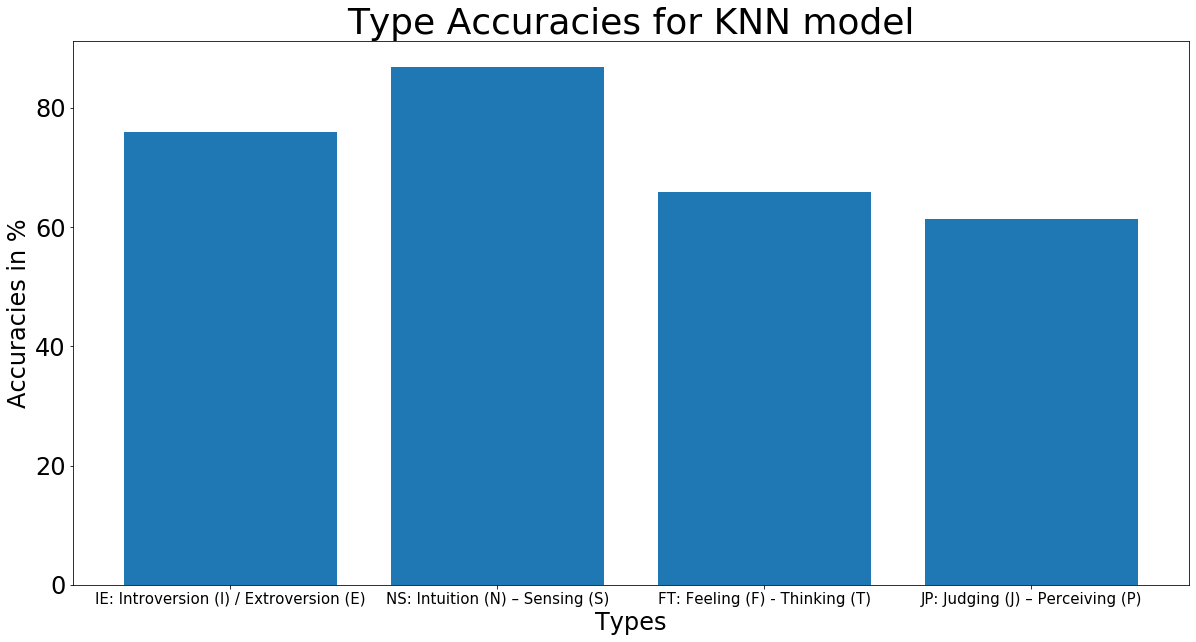

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.title('Type Accuracies for KNN model',fontsize=36, rotation=0)
plt.ylabel('Accuracies in %',fontsize=24, rotation=90)
plt.xlabel('Types',fontsize=24, rotation=0)
models = ['IE: Introversion (I) / Extroversion (E)', 'NS: Intuition (N) – Sensing (S)', 'FT: Feeling (F) - Thinking (T)', 'JP: Judging (J) – Perceiving (P)']
accuracy = [75.93,86.86,65.83,61.41]
plt.bar(models,accuracy)
plt.show()

In [23]:
for l in range(len(type_indicators)):
    print("\n%s " % (type_indicators[l]))
    Y = list_personality[:,l]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    svmm = SVC(kernel='linear')
    svmm.fit(X_train, y_train)
    y_pred4=svmm.predict(X_test)
    svmm.score(X_train, y_train)
    from sklearn.metrics import accuracy_score
    print("Accuracy:",accuracy_score(y_test, y_pred4))
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred4))

    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    print("accuracy=",accuracy_score(y_test,y_pred4))
    print("f1Score(weighted)=",f1_score(y_test,y_pred4,average='weighted'))
    print("f1Score(micro)=",f1_score(y_test,y_pred4,average='micro'))
    print("recall Score(weighted)=",recall_score(y_test, y_pred4, average='weighted'))  
    print("recall Score(micro)=",recall_score(y_test, y_pred4, average='micro'))
    print("precision Score(weighted)=",precision_score(y_test, y_pred4, average='weighted'))  
    print("precision Score(micro)=",precision_score(y_test, y_pred4, average='micro'))


IE: Introversion (I) / Extroversion (E) 
Accuracy: 0.7731673582295989
[[1634   30]
 [ 462   43]]
accuracy= 0.7731673582295989
f1Score(weighted)= 0.7014302619141227
f1Score(micro)= 0.7731673582295989
recall Score(weighted)= 0.7731673582295989
recall Score(micro)= 0.7731673582295989
precision Score(weighted)= 0.7352176705719037
precision Score(micro)= 0.7731673582295989

NS: Intuition (N) – Sensing (S) 
Accuracy: 0.8616874135546335
[[1869    0]
 [ 300    0]]
accuracy= 0.8616874135546335
f1Score(weighted)= 0.7976690321612729
f1Score(micro)= 0.8616874135546335
recall Score(weighted)= 0.8616874135546335
recall Score(micro)= 0.8616874135546335
precision Score(weighted)= 0.742505198678474
precision Score(micro)= 0.8616874135546335

FT: Feeling (F) - Thinking (T) 


C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Manish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.7528815122176118
[[930 236]
 [300 703]]
accuracy= 0.7528815122176118
f1Score(weighted)= 0.7521099427569887
f1Score(micro)= 0.7528815122176117
recall Score(weighted)= 0.7528815122176118
recall Score(micro)= 0.7528815122176118
precision Score(weighted)= 0.7526623140062041
precision Score(micro)= 0.7528815122176118

JP: Judging (J) – Perceiving (P) 
Accuracy: 0.6606731212540341
[[ 367  480]
 [ 256 1066]]
accuracy= 0.6606731212540341
f1Score(weighted)= 0.6480709036413127
f1Score(micro)= 0.6606731212540341
recall Score(weighted)= 0.6606731212540341
recall Score(micro)= 0.6606731212540341
precision Score(weighted)= 0.6503007260527868
precision Score(micro)= 0.6606731212540341


<Figure size 432x288 with 0 Axes>

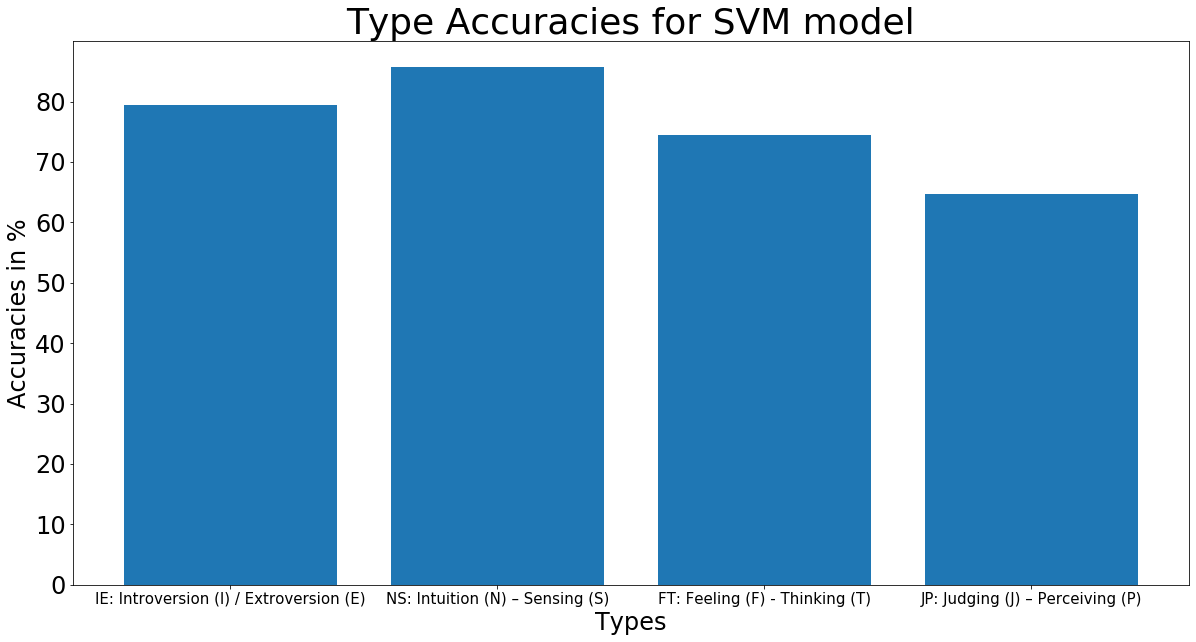

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=24, rotation=0)
plt.title('Type Accuracies for SVM model',fontsize=36, rotation=0)
plt.ylabel('Accuracies in %',fontsize=24, rotation=90)
plt.xlabel('Types',fontsize=24, rotation=0)
models = ['IE: Introversion (I) / Extroversion (E)', 'NS: Intuition (N) – Sensing (S)', 'FT: Feeling (F) - Thinking (T)', 'JP: Judging (J) – Perceiving (P)']
accuracy = [79.48,85.70,74.50,64.77]
plt.bar(models,accuracy)
plt.show()

In [25]:
my_posts  ="hello i am a very shy person and i dont like meeting people. i am also an innovator"
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_data(mydata, remove_stop_words=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

1 of 1 rows


In [26]:
result = []

for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
    
    logregg = LogisticRegression(max_iter=100,penalty='l2',solver='saga')
    logregg.fit(X_train, y_train)
    
    y_pred = logregg.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) – Sensing (S) ...
FT: Feeling (F) - Thinking (T) ...
JP: Judging (J) – Perceiving (P) ...


In [27]:
print("The result is: ", translate_back(result))

The result is:  INFP


In [28]:
from sklearn.preprocessing import LabelBinarizer


labels=text.index.tolist()
encoder=LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
labels=encoder.fit_transform(labels)
labels=np.array(labels)
print(labels[50:55])

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


In [29]:
mbti_dict={0:'ENFJ',1:'ENFP',2:'ENTJ',3:'ENTP',4:'ESFJ',5:'ESFP',6:'ESTJ',7:'ESTP',8:'INFJ',9:'INFP',10:'INTJ',11:'INTP',12:'ISFJ',13:'ISFP',14:'ISFP',15:'ISTP'}

In [30]:
import re
def post_cleaner(post):
   
    post = post.lower() 
    
  
    post=post.replace('|||',"") 

   
    post = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', post, flags=re.MULTILINE) 
    
    puncs1=['@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/']
    for punc in puncs1:
        post=post.replace(punc,'') 

    puncs2=[',','.','?','!','\n']
    for punc in puncs2:
        post=post.replace(punc,' ') 
        
    post=re.sub( '\s+', ' ', post ).strip()
    return post

In [31]:
import re
posts=text.posts.tolist()
posts=[post_cleaner(post) for post in posts]

In [32]:
from collections import Counter

word_count=Counter()
for post in posts:
    word_count.update(post.split(" "))

In [33]:
vocab_len=len(word_count)
print(vocab_len)

print(len(posts[0]))

172984
3094


In [34]:
vocab = sorted(word_count, key=word_count.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

posts_ints=[]
for post in posts:
    posts_ints.append([vocab_to_int[word] for word in post.split()])

print(posts_ints[0])
print(len(posts_ints[0]))

[5, 141, 1287, 61293, 22, 703, 1850, 2069, 61294, 89, 72, 2, 84, 13390, 286, 11, 39, 108, 24, 2176, 14, 84, 6, 375, 196, 2, 723, 286, 12342, 7, 2, 241, 115, 12, 133, 148, 574, 24, 134, 1035, 185, 5881, 2140, 2, 459, 189, 762, 11, 61295, 61296, 279, 3, 416, 6, 39, 7396, 34, 86, 814, 14, 4, 238, 3, 22, 20, 3969, 43, 2, 59, 11, 217, 475, 6, 1558, 154, 3, 524, 2, 205, 242, 26, 242, 6, 2559, 26, 61297, 61298, 308, 5, 274, 492, 712, 1216, 12655, 61299, 41, 257, 7322, 987, 6, 1077, 39, 3300, 5, 1, 31, 161, 1077, 64, 169, 1108, 11, 39, 130, 2803, 3858, 1989, 11, 7024, 150, 154, 28515, 26, 4, 5882, 2233, 510, 211, 62, 16, 565, 3459, 443, 2804, 8, 309, 95, 32, 6508, 218, 7, 81, 3, 33, 49, 47, 90, 408, 221, 626, 309, 218, 630, 342, 5, 4236, 40, 532, 73, 43, 76, 11, 7024, 5185, 9, 1027, 4, 464, 492, 5, 4, 75, 46, 41, 8, 940, 4, 75, 46, 41, 8, 9, 833, 1489, 11, 8, 1, 56, 22, 354, 10262, 2, 684, 6, 111, 626, 11286, 613, 194, 35, 103, 39, 417, 464, 568, 1120, 62, 5, 35, 21, 39, 92, 954, 417, 464, 568

In [35]:
posts_lens = Counter([len(x) for x in posts])
print("Zero-length reviews: {}".format(posts_lens[0]))
print("Maximum review length: {}".format(max(posts_lens)))
print("Minimum review length: {}".format(min(posts_lens)))

seq_len = 500
features=np.zeros((len(posts_ints),seq_len),dtype=int)
for i, row in enumerate(posts_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]
print(features[:10])

Zero-length reviews: 0
Maximum review length: 9588
Minimum review length: 13
[[   5  141 1287 ...  222  278    1]
 [  18  751    2 ...    2 1660 4189]
 [  75   46  386 ...   24 2234   75]
 ...
 [   1  259    3 ...   17  631    3]
 [  18   22  120 ... 4330  659   11]
 [  11   19 1197 ...   47 2496  112]]


In [36]:
split_frac = 0.85

num_ele=int(split_frac*len(features))
rem_ele=len(features)-num_ele
train_x, val_x = features[:num_ele],features[num_ele:int(rem_ele/2)+num_ele]
train_y, val_y = labels[:num_ele],labels[num_ele:int(rem_ele/2)+num_ele]

test_x =features[num_ele+int(rem_ele/2):]
test_y = labels[num_ele+int(rem_ele/2):]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(7373, 500) 
Validation set: 	(651, 500) 
Test set: 		(651, 500)


In [37]:
lstm_size = 128
lstm_layers = 1
batch_size = 128
learning_rate = 0.01
embed_dim=250

In [38]:
n_words = len(vocab_to_int) + 1 
graph = tf.Graph()
with graph.as_default():
    input_data = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [39]:
with graph.as_default():
    embedding= tf.Variable(tf.random_uniform(shape=(n_words,embed_dim),minval=-1,maxval=1))
    embed=tf.nn.embedding_lookup(embedding,input_data)
    

Instructions for updating:
Colocations handled automatically by placer.


In [40]:
with graph.as_default():
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)

    drop = tf.contrib.rnn.DropoutWrapper(lstm,output_keep_prob=keep_prob)

    cell = tf.contrib.rnn.MultiRNNCell([drop]* lstm_layers)
    
    initial_state = cell.zero_state(batch_size, tf.float32)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [41]:
with graph.as_default():
    outputs,final_state=tf.nn.dynamic_rnn(cell,embed,dtype=tf.float32 )

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
with graph.as_default():
    
    pre = tf.layers.dense(outputs[:,-1], 16, activation=tf.nn.relu)
    predictions=tf.layers.dense(pre, 16, activation=tf.nn.softmax)
    
    cost = tf.losses.mean_squared_error(labels_, predictions)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [43]:
with graph.as_default():
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [44]:
def get_batches(x, y, batch_size=100):    
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [45]:
epochs = 3

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
            feed = {input_data: x,
                    labels_: y,
                    keep_prob: 1.0,
                    initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_size):
                    feed = {input_data: x,
                            labels_: y,
                            keep_prob: 1,
                            initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/mbti.ckpt")

Epoch: 0/3 Iteration: 5 Train loss: 0.058
Epoch: 0/3 Iteration: 10 Train loss: 0.057
Epoch: 0/3 Iteration: 15 Train loss: 0.056
Epoch: 0/3 Iteration: 20 Train loss: 0.056
Epoch: 0/3 Iteration: 25 Train loss: 0.055
Val acc: 0.938
Epoch: 0/3 Iteration: 30 Train loss: 0.055
Epoch: 0/3 Iteration: 35 Train loss: 0.054
Epoch: 0/3 Iteration: 40 Train loss: 0.055
Epoch: 0/3 Iteration: 45 Train loss: 0.055
Epoch: 0/3 Iteration: 50 Train loss: 0.055
Val acc: 0.938
Epoch: 0/3 Iteration: 55 Train loss: 0.054
Epoch: 1/3 Iteration: 60 Train loss: 0.053
Epoch: 1/3 Iteration: 65 Train loss: 0.052
Epoch: 1/3 Iteration: 70 Train loss: 0.052
Epoch: 1/3 Iteration: 75 Train loss: 0.054
Val acc: 0.938
Epoch: 1/3 Iteration: 80 Train loss: 0.053
Epoch: 1/3 Iteration: 85 Train loss: 0.051
Epoch: 1/3 Iteration: 90 Train loss: 0.055
Epoch: 1/3 Iteration: 95 Train loss: 0.053
Epoch: 1/3 Iteration: 100 Train loss: 0.053
Val acc: 0.936
Epoch: 1/3 Iteration: 105 Train loss: 0.054
Epoch: 1/3 Iteration: 110 Train loss

In [46]:
test_acc = []
with tf.Session(graph=graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_size), 1):
        feed = {input_data: x,
                labels_: y,
                keep_prob: 1,
                initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from checkpoints\mbti.ckpt
Test accuracy: 0.932
